# Prepare data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df = df[df['location'] == 'Spain'].reset_index(drop=True)

In [3]:
start_idx = df[df['date'] == "4/1/2020"].index[0]
end_idx = df[df['date'] == "4/30/2020"].index[0]
df = df.iloc[start_idx:end_idx + 1].reset_index(drop=True)

In [4]:
drop_columns = list(df.columns)
drop_columns.remove('date')
drop_columns.remove('total_deaths')
df.drop(columns=drop_columns, inplace=True)

In [5]:
N = len(df)
new_deaths = []

for i in range(N):
    if i == 0:
        new_deaths.append(df.iloc[1].total_deaths - df.iloc[0].total_deaths)
    elif i == N - 1:
        new_deaths.append(df.iloc[i].total_deaths - df.iloc[i - 1].total_deaths)
    else:
        new_deaths.append((df.iloc[i + 1].total_deaths - df.iloc[i - 1].total_deaths) / 2)
        
df['new_deaths'] = new_deaths

In [6]:
df

,date,total_deaths,new_deaths
0,4/1/2020,9387.0,961.0
1,4/2/2020,10348.0,905.5
2,4/3/2020,11198.0,799.5
3,4/4/2020,11947.0,721.5
4,4/5/2020,12641.0,697.0
5,4/6/2020,13341.0,702.0
6,4/7/2020,14045.0,725.5
7,4/8/2020,14792.0,701.0
8,4/9/2020,15447.0,644.5
9,4/10/2020,16081.0,579.5


# Visualization

In [7]:
import matplotlib.pyplot as plt

In [8]:
x = list(range(N))
y = list(df['total_deaths'])

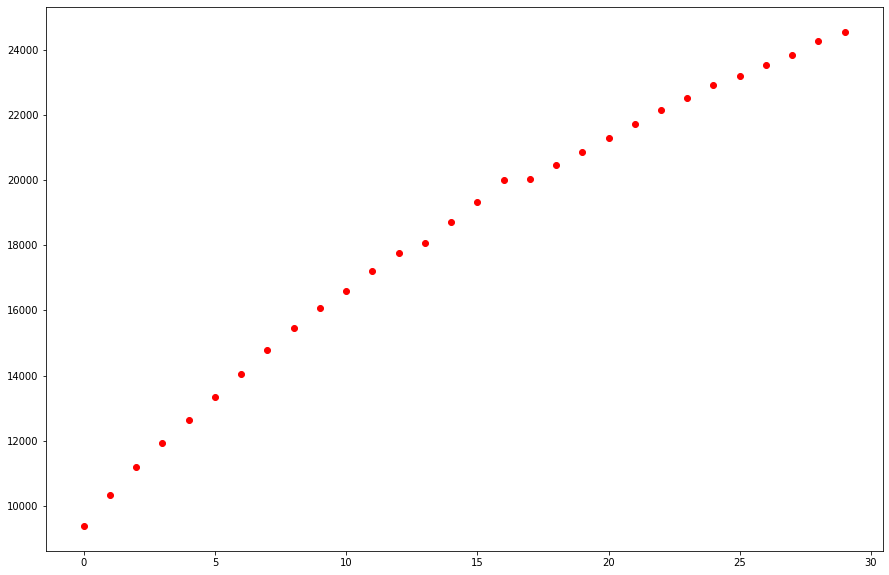

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, 'ro')

In [10]:
x = list(range(N))
y = list(df['new_deaths'])

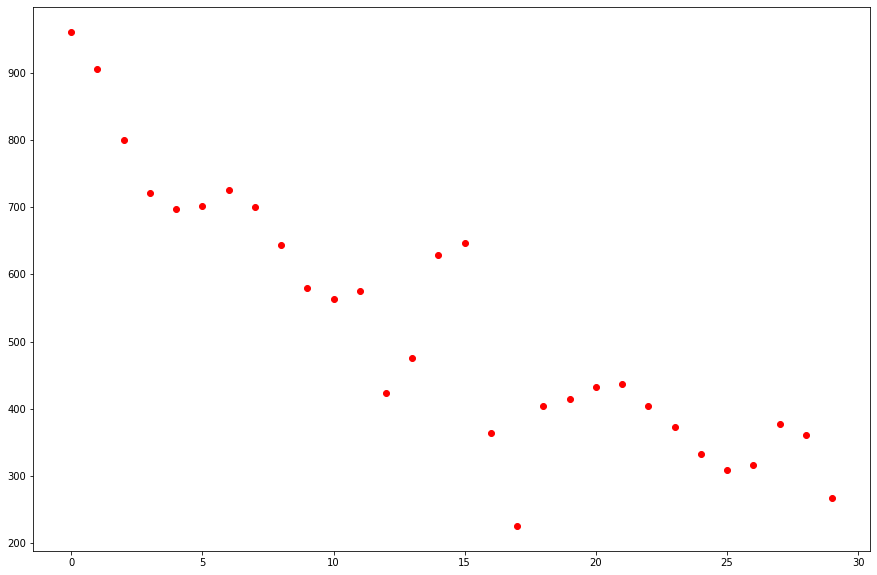

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, 'ro')

In [12]:
import numpy as np

In [13]:
x = np.array(df['total_deaths'])
y = np.array(df['new_deaths']) / np.array(df['total_deaths'])

In [14]:
a, b = np.polyfit(x, y, 1)

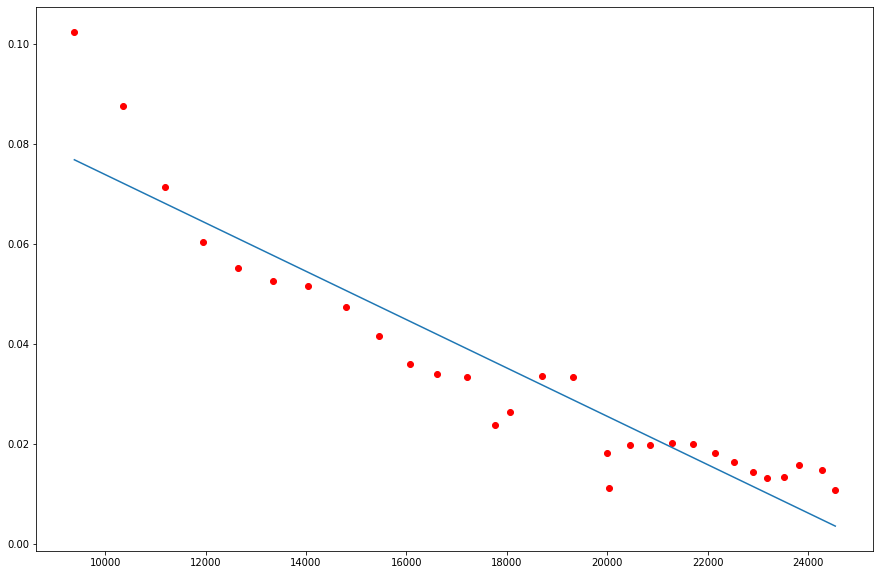

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, 'ro')
ax.plot(x, a * x + b)

In [16]:
a, b

(-4.827879002776788e-06, 0.12215521367938273)

In [17]:
P_0 = df.iloc[0].total_deaths
A = P_0 / (a * P_0 + b)
P_0, A

(9387.0, 122169.433209181)

In [18]:
import math

def calcP(t):
    return (b * A * math.exp(b * t)) / (1 - a * A * math.exp(b * t))

def calcdP(t):
    return (b * b * A * math.exp(b * t)) / ((1 - a * A * math.exp(b * t)) ** 2)

vcalcP = np.vectorize(calcP)
vcalcdP = np.vectorize(calcdP)

In [19]:
x = list(range(N))
y = list(df['total_deaths'])
x_pred = np.linspace(0,30,100)
y_pred = vcalcP(x_pred)

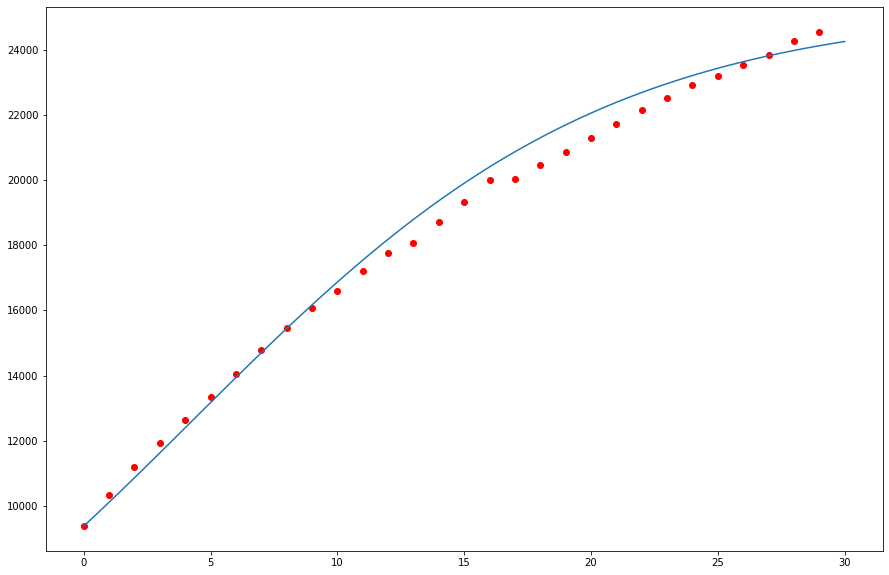

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, 'ro')
ax.plot(x_pred, y_pred)

In [21]:
x = list(range(N))
y = list(df['new_deaths'])
x_pred = np.linspace(0,30,100)
y_pred = vcalcdP(x_pred)

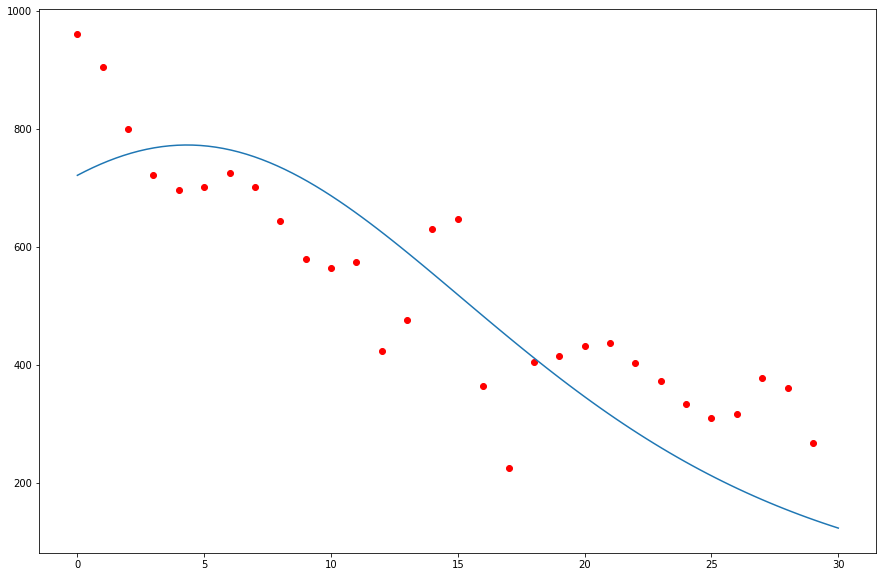

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, 'ro')
ax.plot(x_pred, y_pred)